### Esquema

- Preparacion de entorno
- Análisis exploratorio.
- Limpieza.
- Desarrollo y entrenamiento del modelo.
- Búsqueda de hiper-parámetros y selección del modelo.

## Preparacion de entorno

In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

zsh:1: no matches found: pandas-profiling[notebook]
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn
import missingno as msno
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder

DATASET_PATH = '/Users/charlyjazz/Charlyjazz/precio_locales_CABA.csv'

df = dataframe = pd.read_csv(DATASET_PATH, encoding='utf-8')

In [3]:
def display_metrics_test_train_rmse(metrics, set_ylim1, set_ylim2):
    fig, axes = plt.subplots(figsize=(16, 6), ncols=2)
    for hyperparm_value, hyperparm_metrics in metrics.items():
        for j, (metric_name, metric_values) in enumerate(hyperparm_metrics.items()):
            ax = axes[j]
            ax.set_ylabel(metric_name)
            x_plot = epochs
            y_plot = metric_values
            ax.plot(x_plot, y_plot, label=f'{hyperparm_value:f}')

    for ax in axes:
        ax.set_xlabel('Época')

    legend = axes[0].legend()
    legend.set_title('Learning Rate')
    
    if set_ylim1:
        axes[0].set_ylim(*set_ylim1)
    if set_ylim2:
        axes[1].set_ylim(*set_ylim2)

    plt.tight_layout()
    plt.show()

## Analisis Exploratorio

In [4]:
df_ml = df.copy().drop(['id', 'direccion'], axis=1)
df_ml.head()

,antig,m2total,m2cub,ambientes,banios,barrio,comuna,latitud,longitud,precioUSD,m2precioUSD,comisaria_dista,obelisco_dista,nrobos,sup_espacio_verde,count_gastronomia,count_culturales
0,0,200,200,0,0,LINIERS,9,-34.639300,-58.528647,1500000,7500.000000,1162.621600,14053.797191,134,68426.445,12,0
1,30,50,50,0,1,VILLA DEVOTO,11,-34.611807,-58.528138,125000,2500.000000,1887.227055,13473.139375,23,110997.543,3,0
2,30,414,414,0,2,VILLA REAL,10,-34.616468,-58.528111,590000,1425.120773,1497.020434,13514.662463,33,115341.039,5,0
3,35,414,414,0,2,VILLA REAL,10,-34.616344,-58.527918,730000,1763.000000,1506.066814,13495.631683,33,115500.289,5,0
4,35,285,285,0,1,VILLA REAL,10,-34.616344,-58.527918,550000,1929.000000,1506.066814,13495.631683,33,115500.289,5,0


In [5]:
df_ml['barrio'].unique()

array(['LINIERS', 'VILLA DEVOTO', 'VILLA REAL', 'VERSALLES', 'MATADEROS',
       'MONTE CASTRO', 'VILLA LURO', 'VILLA PUEYRREDON', 'VILLA URQUIZA',
       'AGRONOMIA', 'VELEZ SARSFIELD', 'VILLA DEL PARQUE', 'VILLA LUGANO',
       'SAAVEDRA', 'FLORESTA', 'VILLA SANTA RITA', 'PARQUE AVELLANEDA',
       'PARQUE CHAS', 'VILLA RIACHUELO', 'COGHLAN', 'PATERNAL',
       'VILLA ORTUZAR', 'VILLA GRAL. MITRE', 'FLORES', 'NU�EZ',
       'BELGRANO', 'CHACARITA', 'CABALLITO', 'COLEGIALES', 'VILLA CRESPO',
       'PARQUE CHACABUCO', 'PALERMO', 'VILLA SOLDATI', 'ALMAGRO',
       'NUEVA POMPEYA', 'BOEDO', 'RECOLETA', 'BALVANERA', 'SAN CRISTOBAL',
       'PARQUE PATRICIOS', 'SAN NICOLAS', 'MONTSERRAT', 'CONSTITUCION',
       'RETIRO', 'BARRACAS', 'SAN TELMO', 'BOCA', 'PUERTO MADERO'],
      dtype=object)

In [6]:
indexes = df.barrio == "NU�EZ"
df_ml.loc[indexes, ['barrio']] = 'NUNEZ'

In [7]:
# Unncomment to do EDA 
# profile = ProfileReport(df_ml, title="Precios Locales CABA", html={'style': {'full_width': True}})

In [8]:
# profile

In [9]:
onehot_encoder = OneHotEncoder(sparse= False)
barrio_dummies_df = pd.DataFrame(
    onehot_encoder.fit_transform(df_ml['barrio'].to_numpy().reshape(-1, 1)), 
    columns=['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO', 'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES', 'CONSTITUCION', 'FLORES', 'FLORESTA', 'LINIERS', 'MATADEROS', 'MONTE CASTRO', 'MONTSERRAT', 'NUEVA POMPEYA', 'NUNEZ', 'PALERMO', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS', 'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA', 'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO', 'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE', 'VILLA DEVOTO', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL', 'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI', 'VILLA URQUIZA']
)

In [10]:
df_ml = pd.concat([barrio_dummies_df, df_ml], axis=1).drop(['barrio'], axis=1)

In [11]:
onehot_encoder = OneHotEncoder(sparse= False)
comuna_dummies_df = pd.DataFrame(
    onehot_encoder.fit_transform(df_ml['comuna'].to_numpy().reshape(-1, 1)), 
    columns=["COMUNA_{}".format(i) for i in range(0, 15)]
)
df_ml = pd.concat([comuna_dummies_df, df_ml], axis=1).drop(['comuna'], axis=1)

In [12]:
## Librerías generales
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

## Filtramos advertencias relacionadas con la convergencia de los algoritmos
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

## Clases y funciones útiles de scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error

## Modelo neuronal:
## Multi-Layer Perceptron
from sklearn.neural_network import MLPRegressor

## Otros modelos para comparar con el modelo neuronal
from sklearn.ensemble import RandomForestRegressor

## Barras de progreso en los iteradores
from tqdm.notebook import tqdm

## Herramientas para graficar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')

# https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

# Falta scalar los datos, split, la red, entrenar, y hacer graficos.

# file:///Users/charlyjazz/Downloads/9300-949-7537-1-10-20200120.pdf

# https://www.kaggle.com/georgesaavedra/house-sales-prediction-competition

# https://towardsai.net/p/deep-learning/house-price-predictions-using-keras

# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

test_size = 0.20
TARGET_COL = 'precioUSD'
X = df_ml.drop(columns=[TARGET_COL])
y = df_ml[TARGET_COL]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=22)

### MLPRegressor

In [13]:
model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [14]:
model.score(X_test, y_test)

0.6587493628918698

In [15]:
# Sin Escalar

pred_train = model.predict(X_train)
pred_test  = model.predict(X_test)

print('Train RMSE = {:.0f}'.format(mean_squared_error(pred_train, y_train)))
print('Test  RMSE = {:.0f}'.format(mean_squared_error(pred_test, y_test)))

Train RMSE = 130484044605
Test  RMSE = 85583100361


In [16]:
# Escalando

scaler_X = StandardScaler()
scaler_y = StandardScaler()

scaler_X.fit(X_train)
X_scaled_train = scaler_X.transform(X_train)
X_scaled_test  = scaler_X.transform(X_test)

scaler_y.fit(y_train.values.reshape(-1, 1))
y_scaled_train = scaler_y.transform(y_train.values.reshape(-1, 1))[:,0]
y_scaled_test  = scaler_y.transform(y_test.values.reshape(-1, 1))[:,0]

model = MLPRegressor(random_state=1, max_iter=500)
model.fit(X_scaled_train, y_scaled_train)

pred_scaled_train = model.predict(X_scaled_train)
pred_scaled_test  = model.predict(X_scaled_test)

pred_train = scaler_y.inverse_transform(pred_scaled_train)
pred_test  = scaler_y.inverse_transform(pred_scaled_test)

print('Train RMSE:', mean_squared_error(pred_train, y_train))
print('Test RMSE:', mean_squared_error(pred_test, y_test))

Train RMSE: 9627182356.761433
Test RMSE: 24094647347.68262


In [17]:
x_to_predict = X_test.iloc[50]

y_to_predict = y_test.iloc[50]

x_to_predict_scaled = scaler_X.transform([x_to_predict])

y_predicted_scaled = model.predict(x_to_predict_scaled)

y_predicted = scaler_y.inverse_transform(y_predicted_scaled)

print("Predijo: {}".format(y_predicted))
print("Y Real: {}".format(y_to_predict))

Predijo: [559859.93086637]
Y Real: 600000


#### Hacer variaciones

In [18]:
n_epochs = 100
epochs = range(1, n_epochs+1)

learning_rate_init_values = [
    0.00001, 0.0001, 0.001, 0.0008, 0.002
]

metrics = {}

for learning_rate_init in tqdm(learning_rate_init_values):
    hyperparams = dict(
        solver='adam',
        alpha=0.001,
        hidden_layer_sizes=(100, ),
        activation='relu',
        learning_rate_init=learning_rate_init
    )
    model = MLPRegressor(
        random_state=1, 
        max_iter=1, 
        warm_start=True,
        **hyperparams
    )

    train_rmse_values = []
    test_rmse_values = []

    for epoch in tqdm(epochs, leave=False):
        ## Fiteo del model
        model.fit(X_scaled_train, y_scaled_train)

        ## Predicciones sobre conjunto de entrenamiento y validacion
        pred_train = scaler_y.inverse_transform(model.predict(X_scaled_train))
        pred_test  = scaler_y.inverse_transform(model.predict(X_scaled_test))

        ## Cálculo de métricas
        train_rmse_values.append(mean_squared_error(pred_train, y_train))
        test_rmse_values.append(mean_squared_error(pred_test, y_test))
        
    metrics[learning_rate_init] = pd.DataFrame({
        'train_rmse': train_rmse_values,
        'test_rmse': test_rmse_values
    })
    


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

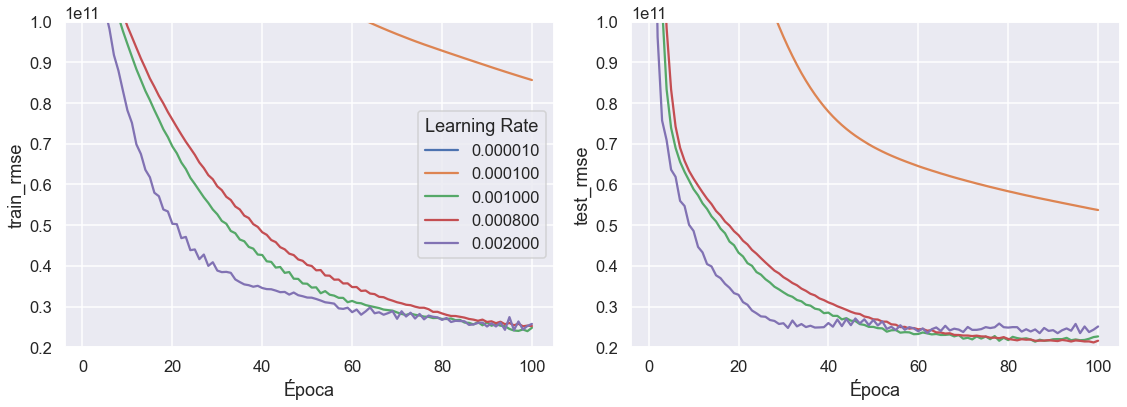

In [19]:
display_metrics_test_train_rmse(metrics, [1e11 / 5, 1e11], [1e11 / 5, 1e11])

# Keras Linear Regression

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = keras.Sequential(
    [
        keras.Input(shape=(77,)),
        layers.Dense(77, activation="relu"),
        layers.Dense(77, activation="relu"),
        layers.Dense(1),
    ]
)

model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

2021-11-26 00:11:09.211475: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 77)                6006      
_________________________________________________________________
dense_1 (Dense)              (None, 77)                6006      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 78        
Total params: 12,090
Trainable params: 12,090
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(
    X_scaled_train,
    y_scaled_train,
    batch_size=64,
    epochs=10
)

2021-11-26 00:11:09.309626: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
47/47 [==============================] - 0s 798us/step - loss: 0.9306
Epoch 2/10
47/47 [==============================] - 0s 840us/step - loss: 0.4550
Epoch 3/10
47/47 [==============================] - 0s 863us/step - loss: 0.2928
Epoch 4/10
47/47 [==============================] - 0s 812us/step - loss: 0.1744
Epoch 5/10
47/47 [==============================] - 0s 836us/step - loss: 0.2024
Epoch 6/10
47/47 [==============================] - 0s 815us/step - loss: 0.2261
Epoch 7/10
47/47 [==============================] - 0s 866us/step - loss: 0.2958
Epoch 8/10
47/47 [==============================] - 0s 810us/step - loss: 0.1527
Epoch 9/10
47/47 [==============================] - 0s 788us/step - loss: 0.1644
Epoch 10/10
47/47 [==============================] - 0s 767us/step - loss: 0.3226


In [24]:
results = model.evaluate(X_scaled_test, y_scaled_test, batch_size=64)

12/12 [==============================] - 0s 858us/step - loss: 0.0980


In [25]:
x_to_predict = X_test.iloc[50]

y_to_predict = y_test.iloc[50]

x_to_predict_scaled = scaler_X.transform([x_to_predict])

y_predicted_scaled = model.predict(x_to_predict_scaled)

y_predicted = scaler_y.inverse_transform(y_predicted_scaled)

print("Predijo: {}".format(y_predicted))
print("Y Real: {}".format(y_to_predict))

Predijo: [[631934.6]]
Y Real: 600000


## Model Tunnning, Parameters Search

In [26]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('layers', 2, 10)):
        model.add(
            layers.Dense(
                units=hp.Int(
                    'units_' + str(i),
                    min_value=32,
                    max_value=77 * 2,
                    step=32
                ),
                activation='relu'
            )
        )
    model.add(layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [0.00001, 0.0001, 0.001, 0.0008, 0.002])),
        loss='mse',
        metrics=['mse', 'accuracy'])
    return model

In [27]:
import kerastuner as kt

In [28]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=30,
    hyperband_iterations=2)

tuner.search(
            X_scaled_train,
            y_scaled_train,
            epochs=10, 
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)]
)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


Traceback (most recent call last):
  File "/Users/charlyjazz/opt/anaconda3/lib/python3.8/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "/var/folders/vr/p4v2w30n4n116cx00_ybhvqm0000gn/T/ipykernel_72758/1622437705.py", line 2, in build_model
    model = Sequential()
NameError: name 'Sequential' is not defined


Traceback (most recent call last):
  File "/Users/charlyjazz/opt/anaconda3/lib/python3.8/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "/var/folders/vr/p4v2w30n4n116cx00_ybhvqm0000gn/T/ipykernel_72758/1622437705.py", line 2, in build_model
    model = Sequential()
NameError: name 'Sequential' is not defined


Traceback (most recent call last):
  File "/Users/charlyjazz/opt/anaconda3/lib/python3.8/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "/var/folders/vr/p4v2w30n4n116cx00_ybhvqm0000gn/T/ipykernel_72758/1622437705.py", line 2, in build_model
    model = Sequential()
NameError: name 'Sequential' is not defined


Traceback (most recent call last):
  File "/Users/charlyjazz/opt/anaconda3/lib/python3.8/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "/var/folders/vr/p4v2w30n4n116cx00_ybhvqm0000gn/T/ipykernel_72758/1622437705.py", line 2, in build_model
    model = Sequential()
NameError: name 'Sequential' is not defined


Traceback (most recent call last):
  File "/Users/charlyjazz/opt/anaconda3/lib/python3.8/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "/var/folders/vr/p4v2w30n4n116cx00_ybhvqm0000gn/T/ipykernel_72758/1622437705.py", line 2, in build_model
    model = Sequential()
NameError: name 'Sequential' is not defined


Traceback (most recent call last):
  File "/Users/charlyjazz/opt/anaconda3/lib/python3.8/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "/var/folders/vr/p4v2w30n4n116cx00_ybhvqm0000gn/T/ipykernel_72758/1622437705.py", line 2, in build_model
    model = Sequential()
NameError: name 'Sequential' is not defined


RuntimeError: Too many failed attempts to build model.

In [ ]:
best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

print("best_hyperparameters", best_hyperparameters)

In [ ]:
x_to_predict = X_test.iloc[50]

y_to_predict = y_test.iloc[50]

x_to_predict_scaled = scaler_X.transform([x_to_predict])

y_predicted_scaled = best_model.predict(x_to_predict_scaled)

y_predicted = scaler_y.inverse_transform(y_predicted_scaled)

print("Predijo: {}".format(y_predicted))
print("Y Real: {}".format(y_to_predict))